# Circle Datasets (NonLinearity)

```
def make_circles(
    n_samples: int | tuple[int, int] = 100,
    *,
    shuffle: bool = True,
    noise: Float | None = None,
    random_state: Int | RandomState | None = None,
    factor: Float = 0.8
) -> tuple[ndarray, ndarray]
```

In [288]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.03, random_state=42)
X.shape, y.shape

((500, 2), (500,))

# Visulization of Data

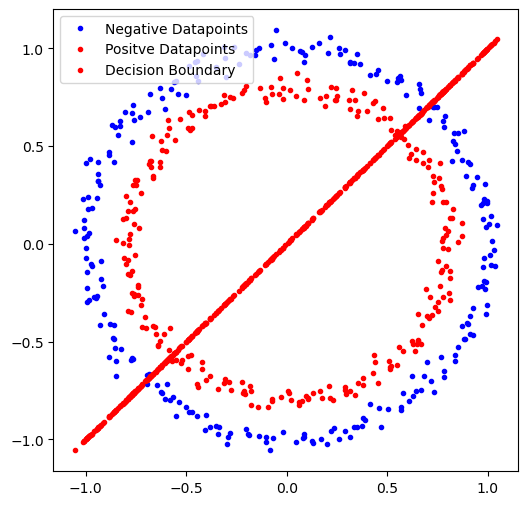

In [289]:
# visualize

y_equal_1 = X[y == 1]
y_equal_0 = X[y == 0]

zero_col = X[:,0].reshape(-1,1)
y_line = 1 * zero_col + 0


plt.figure(figsize=(6,6))
plt.plot(y_equal_0[:,0].reshape(-1,1), y_equal_0[:,1].reshape(-1,1), "b.", label="Negative Datapoints")
plt.plot(y_equal_1[:,0], y_equal_1[:,1], "r.", label="Positve Datapoints")

plt.plot(zero_col, y_line, "r.", label="Decision Boundary")

plt.legend()
plt.show()


# Convert into Tensors and Train Test splits

In [290]:
from sklearn.model_selection import train_test_split
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train.shape, y_train.shape

(torch.Size([350, 2]), torch.Size([350]))

In [291]:
# y_equal_1 = X_train[y_train == 1]
# y_equal_0 = X_train[y_train == 0]

# zero_col = X_train[:,0]
# y_line = 1 * zero_col + 0


# plt.figure(figsize=(6,6))
# plt.plot(y_equal_0[:,0].reshape(-1,1), y_equal_0[:,1].reshape(-1,1), "b.", label="Train Negative Datapoints")
# plt.plot(y_equal_1[:,0], y_equal_1[:,1], "r.", label="Train Positve Datapoints")

# plt.plot(zero_col, y_line, "r.", label="Train Decision Boundary")

# plt.legend()
# plt.show()

# ANN

Combination of linear and non linear which are potenmtially find able to pattern in data

In [292]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [293]:
from torch import nn

class ClassficationCircle(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    

model = ClassficationCircle()
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5544,  0.3042],
                      [ 0.3494,  0.6943],
                      [-0.6316,  0.5144],
                      [-0.5390,  0.6262],
                      [-0.2473, -0.1935],
                      [-0.4639,  0.4718],
                      [-0.5642,  0.3568],
                      [ 0.4994,  0.4392],
                      [-0.4996, -0.1848],
                      [-0.6941, -0.3758],
                      [-0.6738, -0.4540],
                      [-0.1001,  0.3903],
                      [ 0.0419,  0.1072],
                      [-0.5941, -0.3670],
                      [ 0.1770, -0.4994],
                      [-0.4748, -0.5783]])),
             ('layer1.bias',
              tensor([-0.3456, -0.1544, -0.5825,  0.2955, -0.0074, -0.5371, -0.3098,  0.7011,
                      -0.5237, -0.2466,  0.6230, -0.6612, -0.2850,  0.5515,  0.1565, -0.6434])),
             ('layer2.weight',
              tensor([[ 0.0117,  0.1056, -0

In [294]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [295]:
import torch

epochs = 100
for epoch in range(epochs):
    model.train()

    # Forward pass
    y_logits = model(X_train).squeeze()
    y_pred_probs = torch.sigmoid(y_logits)  # Convert logits to probabilities
    y_pred_train = torch.round(y_pred_probs)  # Convert probabilities to binary labels

    # Calculate loss (ensure loss function receives correct inputs)
    loss = loss_fn(y_logits, y_train)  # If using BCEWithLogitsLoss
    # loss = loss_fn(y_pred_probs, y_train)  # Use this if using BCELoss

    acc = accuracy_fn(y_train, y_pred_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print epoch progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f} | Acc: {acc:.2f}%")


Epoch 0/100 | Loss: 0.7059 | Acc: 53.43%
Epoch 10/100 | Loss: 0.6964 | Acc: 50.29%
Epoch 20/100 | Loss: 0.6928 | Acc: 49.43%
Epoch 30/100 | Loss: 0.6909 | Acc: 51.71%
Epoch 40/100 | Loss: 0.6896 | Acc: 62.86%
Epoch 50/100 | Loss: 0.6884 | Acc: 65.43%
Epoch 60/100 | Loss: 0.6873 | Acc: 60.57%
Epoch 70/100 | Loss: 0.6862 | Acc: 56.29%
Epoch 80/100 | Loss: 0.6851 | Acc: 56.29%
Epoch 90/100 | Loss: 0.6841 | Acc: 57.43%
